In [65]:
# remove the comment you aren't running this file via Google Colab

# !pip install pandas
# !pip install seaborn
# !pip install matplotlib
# !pip install scikit-learn
# !pip install imblearn
# !pip install geopy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
new_df = pd.read_csv('/content/drive/MyDrive/Datasets/New_bookings.csv')
new_df.head()

,SHIPMENT_NUMBER,SHIPPER_ID,CARRIER_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,LAST_DELIVERY_LONGITUDE,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST
0,SEZHUK-240118-283413,ee7cbc7b-4f14-44ac-9c6e-086d70a27141,CAUK000872,Tractor Unit,Box,DUBLIN,DN3 3FF,53.407411,-6.238118,53.537912,-1.033570,2024-01-18T18:00:00.000Z,2024-01-18T23:00:00.000Z,2024-01-19T12:00:00.000Z,2024-01-19T13:00:00.000Z
1,SEZHUK-240111-281159,192cd5b5-978c-4681-b206-2f4d04e081ec,CAUK000876,Tractor Unit,Curtain-Side 13.6M Trailer,LS24 9SD,BT26 6JJ,53.882244,-1.267537,54.474078,-6.104285,2024-01-12T10:00:00.000Z,2024-01-16T07:00:00.000Z,2024-01-16T07:30:00.000Z,2024-01-16T08:00:00.000Z
2,SEZHUK-240110-280958,ee7cbc7b-4f14-44ac-9c6e-086d70a27141,CAUK000872,Tractor Unit,Curtain-Side 13.6M Trailer,DUBLIN,DN3 3FF,53.407411,-6.238118,53.537912,-1.033570,2024-01-11T15:03:00.000Z,2024-01-11T15:33:00.000Z,2024-01-12T14:33:00.000Z,2024-01-12T15:03:00.000Z
3,SEZHUK-240115-282151,3244246f-e37c-4ba4-b9b3-61416a4449ae,CAUK000250,Tractor Unit,Curtain-Side 13.6M Trailer,S80 3FY,DUBLIN,53.293393,-1.074008,53.294121,-6.441900,2024-01-16T06:00:00.000Z,2024-01-16T06:59:00.000Z,2024-01-18T11:01:00.000Z,2024-01-18T11:31:00.000Z
4,SEZHUK-240110-280768,3244246f-e37c-4ba4-b9b3-61416a4449ae,CAUK000250,Tractor Unit,Curtain-Side 13.6M Trailer,S80 3FY,BT36 7LQ,53.293393,-1.074008,54.664518,-5.932184,2024-01-11T06:00:00.000Z,2024-01-11T06:59:00.000Z,2024-01-15T07:25:00.000Z,2024-01-15T07:55:00.000Z


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/GPS_data.csv')
df.head()

,SHIPMENT_NUMBER,LAT,LON,RECORD_TIMESTAMP
0,SEZHUK-230918-245388,53.291931,-1.072948,2023-10-09T19:25:00.000+0100
1,SEZHUK-230918-245388,53.400404,-1.078563,2023-10-09T19:40:00.000+0100
2,SEZHUK-230918-245388,53.574182,-1.215761,2023-10-09T19:55:00.000+0100
3,SEZHUK-230918-245388,53.706805,-1.336503,2023-10-09T20:10:00.000+0100
4,SEZHUK-230918-245388,53.747501,-1.640298,2023-10-09T20:25:00.000+0100


In [6]:
shipping_df = pd.read_csv('/content/drive/MyDrive/Datasets/Shipment_bookings.csv')
shipping_df.head()

,PROJECT_ID,SHIPMENT_NUMBER,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,LAST_DELIVERY_LONGITUDE,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST
0,5456fcfa-5b0c-428e-b322-240d508b6660,SEZHUK-231005-250448,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,PE29 2XR,EH48 2FB,52.315672,-0.157664,55.877803,-3.648558,2023-10-06T09:45:00.000Z,2023-10-06T10:00:00.000Z,2023-10-09T09:55:00.000Z,2023-10-09T10:25:00.000Z
1,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,-1.231993,2023-12-19T14:20:00.000Z,2023-12-19T16:00:00.000Z,2023-12-20T06:00:00.000Z,2023-12-20T08:56:00.000Z
2,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231210-272018,CAUK000435,Tractor Unit,Box 44ft,BD5 8LZ,EN3 7QP,53.767302,-1.746560,51.660700,-0.022247,2023-12-14T01:20:00.000Z,2023-12-14T03:00:00.000Z,2023-12-14T07:03:00.000Z,2023-12-14T10:43:00.000Z
3,40415fe3-e446-4d1e-b141-3698b0dc47f3,SEZHUK-231211-272127,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,HP22 5BL,NG31 7UH,51.779657,-0.772897,52.888113,-0.634948,2023-12-13T09:00:00.000Z,2023-12-13T09:30:00.000Z,2023-12-13T15:30:00.000Z,2023-12-13T16:00:00.000Z
4,39a4e234-5d35-4d94-8e8a-b8bf6fe13953,SEZHUK-231025-256168,CAUK000155,Tractor Unit,Curtain Side,CV23 8BQ,G75 0ZZ,52.334853,-1.180450,55.735089,-4.168719,2023-11-07T14:00:00.000Z,2023-11-07T15:00:00.000Z,2023-11-07T23:00:00.000Z,2023-11-07T23:59:00.000Z


Preprocessing Data

In [7]:
df.isnull().sum()

SHIPMENT_NUMBER     0
LAT                 0
LON                 0
RECORD_TIMESTAMP    0
dtype: int64

In [8]:
shipping_df.isnull().sum()

PROJECT_ID                            0
SHIPMENT_NUMBER                       0
CARRIER_DISPLAY_ID                    0
VEHICLE_SIZE                          0
VEHICLE_BUILD_UP                      0
FIRST_COLLECTION_POST_CODE            1
LAST_DELIVERY_POST_CODE               4
FIRST_COLLECTION_LATITUDE             0
FIRST_COLLECTION_LONGITUDE            0
LAST_DELIVERY_LATITUDE                0
LAST_DELIVERY_LONGITUDE               0
FIRST_COLLECTION_SCHEDULE_EARLIEST    0
FIRST_COLLECTION_SCHEDULE_LATEST      0
LAST_DELIVERY_SCHEDULE_EARLIEST       0
LAST_DELIVERY_SCHEDULE_LATEST         0
dtype: int64

In [9]:
df['RECORD_TIMESTAMP'].dtype

dtype('O')

In [10]:
# change record_timestamp to datetime data type
df['RECORD_TIMESTAMP'] = pd.to_datetime(df['RECORD_TIMESTAMP'], utc=True)

In [11]:
df['RECORD_TIMESTAMP'].dtype

datetime64[ns, UTC]

In [12]:
df.head()

,SHIPMENT_NUMBER,LAT,LON,RECORD_TIMESTAMP
0,SEZHUK-230918-245388,53.291931,-1.072948,2023-10-09 18:25:00+00:00
1,SEZHUK-230918-245388,53.400404,-1.078563,2023-10-09 18:40:00+00:00
2,SEZHUK-230918-245388,53.574182,-1.215761,2023-10-09 18:55:00+00:00
3,SEZHUK-230918-245388,53.706805,-1.336503,2023-10-09 19:10:00+00:00
4,SEZHUK-230918-245388,53.747501,-1.640298,2023-10-09 19:25:00+00:00


In [13]:
shipping_df['FIRST_COLLECTION_SCHEDULE_LATEST'].dtype

dtype('O')

In [15]:
# convert time data in shipping dataframe
datetime_cols = [
    'FIRST_COLLECTION_SCHEDULE_EARLIEST',
    'FIRST_COLLECTION_SCHEDULE_LATEST',
    'LAST_DELIVERY_SCHEDULE_EARLIEST',
    'LAST_DELIVERY_SCHEDULE_LATEST'
]

for cols in datetime_cols:
  shipping_df[cols] = pd.to_datetime(shipping_df[cols], utc=True)

In [16]:
shipping_df['FIRST_COLLECTION_SCHEDULE_LATEST'].dtype

datetime64[ns, UTC]

In [17]:
shipping_df.head()

,PROJECT_ID,SHIPMENT_NUMBER,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,LAST_DELIVERY_LONGITUDE,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST
0,5456fcfa-5b0c-428e-b322-240d508b6660,SEZHUK-231005-250448,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,PE29 2XR,EH48 2FB,52.315672,-0.157664,55.877803,-3.648558,2023-10-06 09:45:00+00:00,2023-10-06 10:00:00+00:00,2023-10-09 09:55:00+00:00,2023-10-09 10:25:00+00:00
1,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,-1.231993,2023-12-19 14:20:00+00:00,2023-12-19 16:00:00+00:00,2023-12-20 06:00:00+00:00,2023-12-20 08:56:00+00:00
2,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231210-272018,CAUK000435,Tractor Unit,Box 44ft,BD5 8LZ,EN3 7QP,53.767302,-1.746560,51.660700,-0.022247,2023-12-14 01:20:00+00:00,2023-12-14 03:00:00+00:00,2023-12-14 07:03:00+00:00,2023-12-14 10:43:00+00:00
3,40415fe3-e446-4d1e-b141-3698b0dc47f3,SEZHUK-231211-272127,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,HP22 5BL,NG31 7UH,51.779657,-0.772897,52.888113,-0.634948,2023-12-13 09:00:00+00:00,2023-12-13 09:30:00+00:00,2023-12-13 15:30:00+00:00,2023-12-13 16:00:00+00:00
4,39a4e234-5d35-4d94-8e8a-b8bf6fe13953,SEZHUK-231025-256168,CAUK000155,Tractor Unit,Curtain Side,CV23 8BQ,G75 0ZZ,52.334853,-1.180450,55.735089,-4.168719,2023-11-07 14:00:00+00:00,2023-11-07 15:00:00+00:00,2023-11-07 23:00:00+00:00,2023-11-07 23:59:00+00:00


In [18]:
# merge GPS and Shipping data
merged_data = pd.merge(shipping_df, df, on='SHIPMENT_NUMBER', how='inner')
merged_data.head()

,PROJECT_ID,SHIPMENT_NUMBER,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,LAST_DELIVERY_LONGITUDE,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST,LAT,LON,RECORD_TIMESTAMP
0,5456fcfa-5b0c-428e-b322-240d508b6660,SEZHUK-231005-250448,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,PE29 2XR,EH48 2FB,52.315672,-0.157664,55.877803,-3.648558,2023-10-06 09:45:00+00:00,2023-10-06 10:00:00+00:00,2023-10-09 09:55:00+00:00,2023-10-09 10:25:00+00:00,52.316349,-0.156690,2023-10-06 08:58:00+00:00
1,5456fcfa-5b0c-428e-b322-240d508b6660,SEZHUK-231005-250448,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,PE29 2XR,EH48 2FB,52.315672,-0.157664,55.877803,-3.648558,2023-10-06 09:45:00+00:00,2023-10-06 10:00:00+00:00,2023-10-09 09:55:00+00:00,2023-10-09 10:25:00+00:00,52.316602,-0.157301,2023-10-06 09:03:00+00:00
2,5456fcfa-5b0c-428e-b322-240d508b6660,SEZHUK-231005-250448,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,PE29 2XR,EH48 2FB,52.315672,-0.157664,55.877803,-3.648558,2023-10-06 09:45:00+00:00,2023-10-06 10:00:00+00:00,2023-10-09 09:55:00+00:00,2023-10-09 10:25:00+00:00,52.316440,-0.157995,2023-10-06 09:05:00+00:00
3,5456fcfa-5b0c-428e-b322-240d508b6660,SEZHUK-231005-250448,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,PE29 2XR,EH48 2FB,52.315672,-0.157664,55.877803,-3.648558,2023-10-06 09:45:00+00:00,2023-10-06 10:00:00+00:00,2023-10-09 09:55:00+00:00,2023-10-09 10:25:00+00:00,52.316544,-0.157263,2023-10-06 09:24:00+00:00
4,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,-1.231993,2023-12-19 14:20:00+00:00,2023-12-19 16:00:00+00:00,2023-12-20 06:00:00+00:00,2023-12-20 08:56:00+00:00,53.763753,-1.739292,2023-12-19 15:47:00+00:00


# Data Cleaning

In [19]:
merged_data.isnull().sum()

PROJECT_ID                              0
SHIPMENT_NUMBER                         0
CARRIER_DISPLAY_ID                      0
VEHICLE_SIZE                            0
VEHICLE_BUILD_UP                        0
FIRST_COLLECTION_POST_CODE            349
LAST_DELIVERY_POST_CODE               528
FIRST_COLLECTION_LATITUDE               0
FIRST_COLLECTION_LONGITUDE              0
LAST_DELIVERY_LATITUDE                  0
LAST_DELIVERY_LONGITUDE                 0
FIRST_COLLECTION_SCHEDULE_EARLIEST      0
FIRST_COLLECTION_SCHEDULE_LATEST        0
LAST_DELIVERY_SCHEDULE_EARLIEST         0
LAST_DELIVERY_SCHEDULE_LATEST           0
LAT                                     0
LON                                     0
RECORD_TIMESTAMP                        0
dtype: int64

In [21]:
# calculate percentage of missing values in merged data
def percentage_missing_values(x):
  missing_rows = merged_data.isnull().sum()
  number_of_rows = merged_data.shape[0]
  percentage_value = (missing_rows / number_of_rows) * 100
  return percentage_value

missing_value = percentage_missing_values(merged_data)
print(missing_value)

PROJECT_ID                            0.000000
SHIPMENT_NUMBER                       0.000000
CARRIER_DISPLAY_ID                    0.000000
VEHICLE_SIZE                          0.000000
VEHICLE_BUILD_UP                      0.000000
FIRST_COLLECTION_POST_CODE            0.054390
LAST_DELIVERY_POST_CODE               0.082286
FIRST_COLLECTION_LATITUDE             0.000000
FIRST_COLLECTION_LONGITUDE            0.000000
LAST_DELIVERY_LATITUDE                0.000000
LAST_DELIVERY_LONGITUDE               0.000000
FIRST_COLLECTION_SCHEDULE_EARLIEST    0.000000
FIRST_COLLECTION_SCHEDULE_LATEST      0.000000
LAST_DELIVERY_SCHEDULE_EARLIEST       0.000000
LAST_DELIVERY_SCHEDULE_LATEST         0.000000
LAT                                   0.000000
LON                                   0.000000
RECORD_TIMESTAMP                      0.000000
dtype: float64


In [22]:
# drop all missing values
merged_data.dropna(inplace=True)

In [23]:
merged_data.isnull().sum()

PROJECT_ID                            0
SHIPMENT_NUMBER                       0
CARRIER_DISPLAY_ID                    0
VEHICLE_SIZE                          0
VEHICLE_BUILD_UP                      0
FIRST_COLLECTION_POST_CODE            0
LAST_DELIVERY_POST_CODE               0
FIRST_COLLECTION_LATITUDE             0
FIRST_COLLECTION_LONGITUDE            0
LAST_DELIVERY_LATITUDE                0
LAST_DELIVERY_LONGITUDE               0
FIRST_COLLECTION_SCHEDULE_EARLIEST    0
FIRST_COLLECTION_SCHEDULE_LATEST      0
LAST_DELIVERY_SCHEDULE_EARLIEST       0
LAST_DELIVERY_SCHEDULE_LATEST         0
LAT                                   0
LON                                   0
RECORD_TIMESTAMP                      0
dtype: int64

In [24]:
merged_data.dtypes

PROJECT_ID                                         object
SHIPMENT_NUMBER                                    object
CARRIER_DISPLAY_ID                                 object
VEHICLE_SIZE                                       object
VEHICLE_BUILD_UP                                   object
FIRST_COLLECTION_POST_CODE                         object
LAST_DELIVERY_POST_CODE                            object
FIRST_COLLECTION_LATITUDE                         float64
FIRST_COLLECTION_LONGITUDE                        float64
LAST_DELIVERY_LATITUDE                            float64
LAST_DELIVERY_LONGITUDE                           float64
FIRST_COLLECTION_SCHEDULE_EARLIEST    datetime64[ns, UTC]
FIRST_COLLECTION_SCHEDULE_LATEST      datetime64[ns, UTC]
LAST_DELIVERY_SCHEDULE_EARLIEST       datetime64[ns, UTC]
LAST_DELIVERY_SCHEDULE_LATEST         datetime64[ns, UTC]
LAT                                               float64
LON                                               float64
RECORD_TIMESTA

In [25]:
# remove rows which contains record timestamp that occurred before first collection earliest.
merged_data = merged_data[merged_data['RECORD_TIMESTAMP'] > merged_data['FIRST_COLLECTION_SCHEDULE_EARLIEST']]

In [26]:
# vehicle type 3.5T Van  3.5 T Van are the same vehicle types , lets merge them
for index, row in merged_data.iterrows():
  if row['VEHICLE_SIZE'] == '3.5T Van' or row['VEHICLE_SIZE'] == '3.5 T Van':
    merged_data.loc[index, 'VEHICLE_SIZE'] = '3.5T Van'

# Question 1

### Percentage of On-Time Deliveries

On-Time delivery are deliveries which occurred at least 30minutes after the scheduled delivery window. Latest Schedule Delivery are deliveries that occurred between 30mins of the Last Delivery Scheduled Latest and these deliveries before or equal to latest schedule delivery are considered on On-Time and Late if delivery time extends the scheduled delivery.

In [27]:
# filter the dataset between october first and december 31st 2023
start_date = pd.to_datetime('2023-10-01')
end_date = pd.to_datetime('2023-12-31')

filtered_data = merged_data[merged_data['RECORD_TIMESTAMP'].dt.date >= start_date.date()]
filtered_data = filtered_data[filtered_data['RECORD_TIMESTAMP'].dt.date <= end_date.date()]

In [28]:
buffer_time = pd.Timedelta(minutes=30)

# create column for on-time delivery, initializing with Late
filtered_data['On-Time Delivery'] = 'Late'

for index, row in filtered_data.iterrows():
  # extract delivery arrival time
  arrival_time = row['RECORD_TIMESTAMP']
  # extract scheduled delivery latest
  scheduled_delivery = row['LAST_DELIVERY_SCHEDULE_LATEST']
  # calculate the latest time package should be delivered
  latest_time = scheduled_delivery + buffer_time
  # check if the arrival_time is within the latest_time range
  if arrival_time <= latest_time:
    filtered_data.loc[index, 'On-Time Delivery'] = 'On-Time'

In [29]:
# percentage of on-time deliveries
total_delivery = len(filtered_data)

# count of on-time deliveries
on_time_deliveries = filtered_data[filtered_data['On-Time Delivery'] == 'On-Time'].shape[0]
percentage_of_on_time_deliveries = (on_time_deliveries / total_delivery) * 100
print(f"Percentage of on-time deliveries: {percentage_of_on_time_deliveries:.2f}%")

Percentage of on-time deliveries: 72.36%


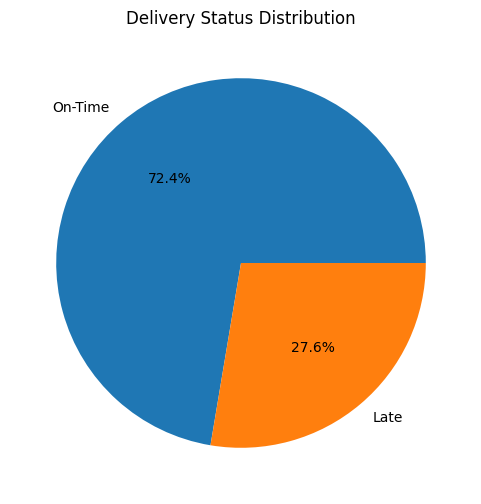

In [30]:
# visulize using a pie plot
delivery_count = filtered_data['On-Time Delivery'].value_counts()

labels = delivery_count.index.to_numpy()
sizes = delivery_count.to_numpy()

# plot pie chart to show distribution between on-time delivery and late
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Delivery Status Distribution")
# plt.axis("equal")
plt.show()

The chart shows the On-Time delivery within October to December to be 72%

# Question 2

### Shipment With Potential Late Delivery

Shipment considered as late delivery are deliveries past the 30mins benchmark after the Last Delivery Scheduled Latest, customers who fall in these categories have to be notified of the delayed delivery.

In [31]:
filtered_data.columns

Index(['PROJECT_ID', 'SHIPMENT_NUMBER', 'CARRIER_DISPLAY_ID', 'VEHICLE_SIZE',
       'VEHICLE_BUILD_UP', 'FIRST_COLLECTION_POST_CODE',
       'LAST_DELIVERY_POST_CODE', 'FIRST_COLLECTION_LATITUDE',
       'FIRST_COLLECTION_LONGITUDE', 'LAST_DELIVERY_LATITUDE',
       'LAST_DELIVERY_LONGITUDE', 'FIRST_COLLECTION_SCHEDULE_EARLIEST',
       'FIRST_COLLECTION_SCHEDULE_LATEST', 'LAST_DELIVERY_SCHEDULE_EARLIEST',
       'LAST_DELIVERY_SCHEDULE_LATEST', 'LAT', 'LON', 'RECORD_TIMESTAMP',
       'On-Time Delivery'],
      dtype='object')

In [32]:
new_df.columns

Index(['SHIPMENT_NUMBER', 'SHIPPER_ID', 'CARRIER_ID', 'VEHICLE_SIZE',
       'VEHICLE_BUILD_UP', 'FIRST_COLLECTION_POST_CODE',
       'LAST_DELIVERY_POST_CODE', 'FIRST_COLLECTION_LATITUDE',
       'FIRST_COLLECTION_LONGITUDE', 'LAST_DELIVERY_LATITUDE',
       'LAST_DELIVERY_LONGITUDE', 'FIRST_COLLECTION_SCHEDULE_EARLIEST',
       'FIRST_COLLECTION_SCHEDULE_LATEST', 'LAST_DELIVERY_SCHEDULE_EARLIEST',
       'LAST_DELIVERY_SCHEDULE_LATEST'],
      dtype='object')

In [33]:
new_df.shape

(1000, 15)

In [35]:
# Shipper_id doesn't exist in the filtered data but is present in the New Shipping Data
#  merge shipper_id from the new_bookings data to the filtered dataframe
data = filtered_data.merge(new_df[['SHIPMENT_NUMBER', 'SHIPPER_ID']], on='SHIPMENT_NUMBER', how='left')
data.head()

,PROJECT_ID,SHIPMENT_NUMBER,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,LAST_DELIVERY_LONGITUDE,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST,LAT,LON,RECORD_TIMESTAMP,On-Time Delivery,SHIPPER_ID
0,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,-1.231993,2023-12-19 14:20:00+00:00,2023-12-19 16:00:00+00:00,2023-12-20 06:00:00+00:00,2023-12-20 08:56:00+00:00,53.763753,-1.739292,2023-12-19 15:47:00+00:00,On-Time,NaN
1,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,-1.231993,2023-12-19 14:20:00+00:00,2023-12-19 16:00:00+00:00,2023-12-20 06:00:00+00:00,2023-12-20 08:56:00+00:00,53.763485,-1.739944,2023-12-19 15:54:00+00:00,On-Time,NaN
2,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,-1.231993,2023-12-19 14:20:00+00:00,2023-12-19 16:00:00+00:00,2023-12-20 06:00:00+00:00,2023-12-20 08:56:00+00:00,53.763283,-1.740726,2023-12-19 15:55:00+00:00,On-Time,NaN
3,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,-1.231993,2023-12-19 14:20:00+00:00,2023-12-19 16:00:00+00:00,2023-12-20 06:00:00+00:00,2023-12-20 08:56:00+00:00,53.762547,-1.743427,2023-12-19 15:56:00+00:00,On-Time,NaN
4,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,-1.231993,2023-12-19 14:20:00+00:00,2023-12-19 16:00:00+00:00,2023-12-20 06:00:00+00:00,2023-12-20 08:56:00+00:00,53.766539,-1.746282,2023-12-19 15:57:00+00:00,On-Time,NaN


In [36]:
# function that checks for delayed delivery.
def delay_time(row):
  if row['On-Time Delivery'] == 'Late':
    return "Alert"
  return "No Alert"

# create a new column named Delayed Time.
data['Delayed_Deliveries'] = data.apply(delay_time,axis=1)
# filter data to only shipment that should be notified
notify_shipment = data[data['Delayed_Deliveries'] == "Alert"]

In [37]:
notify_shipment[['SHIPMENT_NUMBER','LAST_DELIVERY_SCHEDULE_LATEST', 'Delayed_Deliveries']]

,SHIPMENT_NUMBER,LAST_DELIVERY_SCHEDULE_LATEST,Delayed_Deliveries
554,SEZHUK-231211-272127,2023-12-13 16:00:00+00:00,Alert
555,SEZHUK-231211-272127,2023-12-13 16:00:00+00:00,Alert
556,SEZHUK-231211-272127,2023-12-13 16:00:00+00:00,Alert
557,SEZHUK-231211-272127,2023-12-13 16:00:00+00:00,Alert
558,SEZHUK-231211-272127,2023-12-13 16:00:00+00:00,Alert
...,...,...,...
574734,SEZHUK-231014-253126,2023-10-15 17:03:01+00:00,Alert
574735,SEZHUK-231014-253126,2023-10-15 17:03:01+00:00,Alert
574736,SEZHUK-231014-253126,2023-10-15 17:03:01+00:00,Alert
574737,SEZHUK-231014-253126,2023-10-15 17:03:01+00:00,Alert


# Delivery Timeliness in Original Data

In [38]:
# convert time data in merged_data dataframe
datetime_cols = [
    'FIRST_COLLECTION_SCHEDULE_EARLIEST',
    'FIRST_COLLECTION_SCHEDULE_LATEST',
    'LAST_DELIVERY_SCHEDULE_EARLIEST',
    'LAST_DELIVERY_SCHEDULE_LATEST'
]
for cols in datetime_cols:
  merged_data[cols] = pd.to_datetime(merged_data[cols])

In [39]:
# iterate row to calculate ontime and late delivery time
for index, row in merged_data.iterrows():
  # extract arrival time
  arrival_time = row['RECORD_TIMESTAMP']
  # extract scheduled delivery latest
  scheduled_delivery = row['LAST_DELIVERY_SCHEDULE_LATEST']
  latest_time = scheduled_delivery + buffer_time

  # check if the arrival_time is within the latest_time range
  if arrival_time <= latest_time:
    merged_data.loc[index, 'Delivery Status'] = "On Time"
  else:
    merged_data.loc[index, 'Delivery Status'] = "Late"

merged_data.head()

,PROJECT_ID,SHIPMENT_NUMBER,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,LAST_DELIVERY_LONGITUDE,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST,LAT,LON,RECORD_TIMESTAMP,Delivery Status
4,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,-1.231993,2023-12-19 14:20:00+00:00,2023-12-19 16:00:00+00:00,2023-12-20 06:00:00+00:00,2023-12-20 08:56:00+00:00,53.763753,-1.739292,2023-12-19 15:47:00+00:00,On Time
5,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,-1.231993,2023-12-19 14:20:00+00:00,2023-12-19 16:00:00+00:00,2023-12-20 06:00:00+00:00,2023-12-20 08:56:00+00:00,53.763485,-1.739944,2023-12-19 15:54:00+00:00,On Time
6,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,-1.231993,2023-12-19 14:20:00+00:00,2023-12-19 16:00:00+00:00,2023-12-20 06:00:00+00:00,2023-12-20 08:56:00+00:00,53.763283,-1.740726,2023-12-19 15:55:00+00:00,On Time
7,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,-1.231993,2023-12-19 14:20:00+00:00,2023-12-19 16:00:00+00:00,2023-12-20 06:00:00+00:00,2023-12-20 08:56:00+00:00,53.762547,-1.743427,2023-12-19 15:56:00+00:00,On Time
8,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,-1.231993,2023-12-19 14:20:00+00:00,2023-12-19 16:00:00+00:00,2023-12-20 06:00:00+00:00,2023-12-20 08:56:00+00:00,53.766539,-1.746282,2023-12-19 15:57:00+00:00,On Time


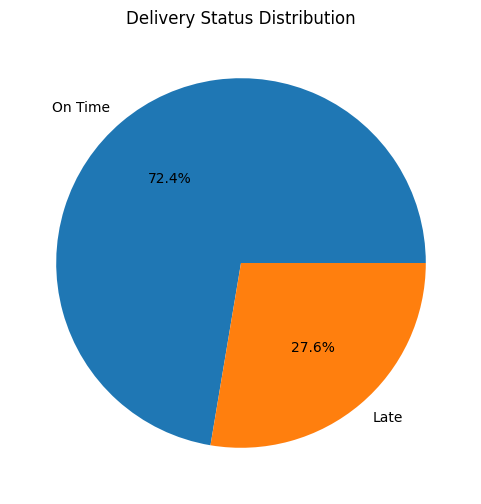

In [40]:
delivery_count = merged_data['Delivery Status'].value_counts()
labels = delivery_count.index.to_numpy()
sizes = delivery_count.to_numpy()

# pie chart to show distribution between on-time delivery and late
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Delivery Status Distribution")
plt.show()

# Trends in Late Deliveries

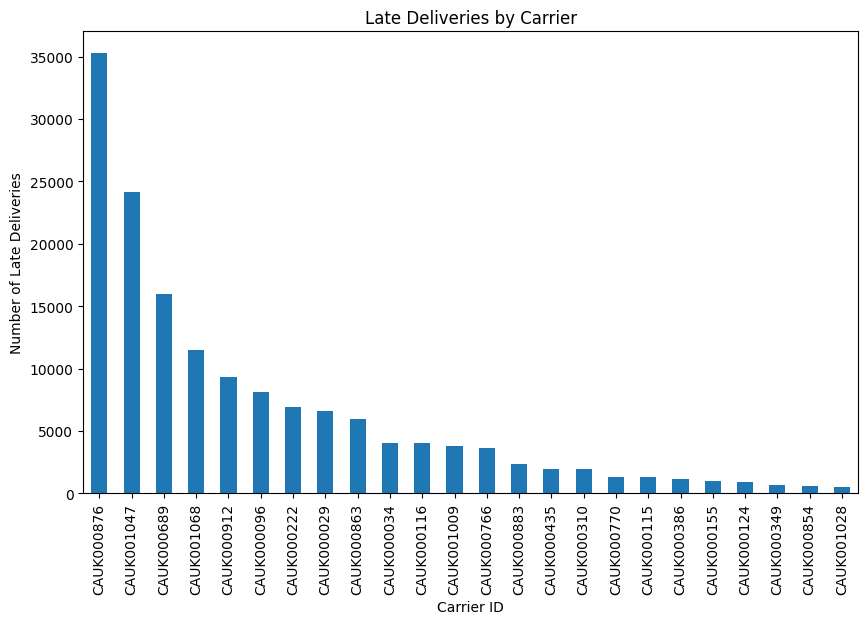

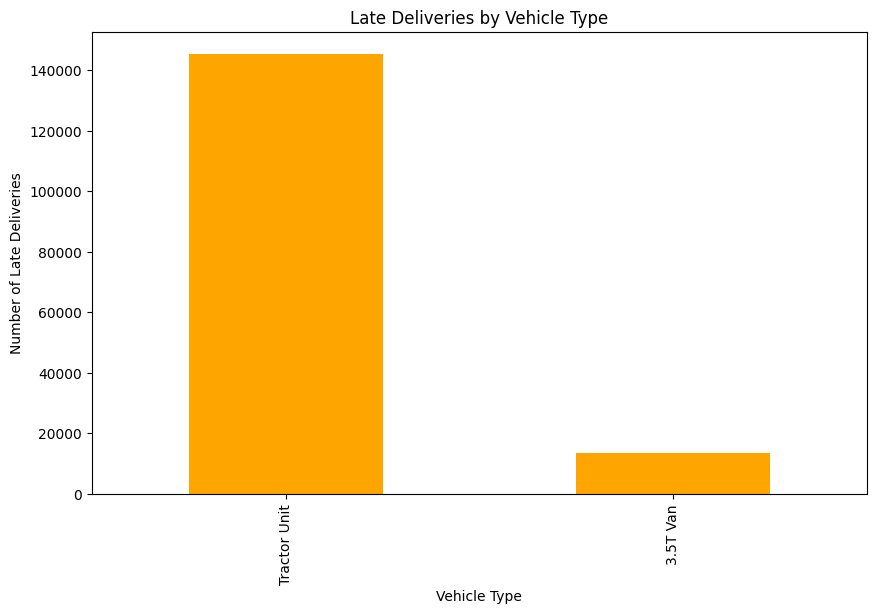

In [41]:
# Filter late deliveries
late_deliveries = merged_data[merged_data['Delivery Status'] == "Late"]

# number late deliveries by carrier
late_by_carrier = late_deliveries['CARRIER_DISPLAY_ID'].value_counts()

# filter number of late delivery, if late delivery is more than 500 for a carrier
late_by_carrier = late_by_carrier[late_by_carrier > 500]

# number of late deliveries by vehicle type
late_by_vehicle_type = late_deliveries['VEHICLE_SIZE'].value_counts()
late_by_vehicle_type = late_by_vehicle_type[late_by_vehicle_type > 500]


# Plot late deliveries by carrier
plt.figure(figsize=(10, 6))
late_by_carrier.plot(kind='bar')
plt.title('Late Deliveries by Carrier')
plt.xlabel('Carrier ID')
plt.ylabel('Number of Late Deliveries')
plt.show()

# Plot late deliveries by vehicle type
plt.figure(figsize=(10, 6))
late_by_vehicle_type.plot(kind='bar', color='orange')
plt.title('Late Deliveries by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Late Deliveries')
plt.show()


The analysis has provided insights into patterns and trends related to late deliveries, highlighting areas of concern and potential improvement.

Through the analysis, specific carriers and vehicle types such as Tractor Unit have been identified as being associated with a higher frequency of late deliveries.This suggests that these carriers and vehicle types may have operational inefficiencies or other factors contributing to delays.

Recommendations:
- Offer resources to help carriers improve their operational efficiency, time management, and adherence to delivery schedules.
- Evaluate the suitability of vehicle types for specific routes and delivery requirements and consider reallocating vehicles based on performance data to optimize delivery operations.
- Introduce performance incentives or penalties to motivate carriers and drivers to meet delivery deadlines consistently.


# Rush Hour & Week Day

We want to assess which day of the week & hour, DigiHaul have more collection requests which would most likely experience late delivery and also which day of the week experience more late deliveries to the customers.

In [42]:
# extract the day of the week.
merged_data['Collection_Day'] = merged_data['FIRST_COLLECTION_SCHEDULE_EARLIEST'].dt.weekday
merged_data['Delivery_Day'] = merged_data['LAST_DELIVERY_SCHEDULE_LATEST'].dt.weekday
merged_data['Collection_Hour'] = merged_data['FIRST_COLLECTION_SCHEDULE_EARLIEST'].dt.hour
merged_data['Delivery_Hour'] = merged_data['LAST_DELIVERY_SCHEDULE_LATEST'].dt.hour

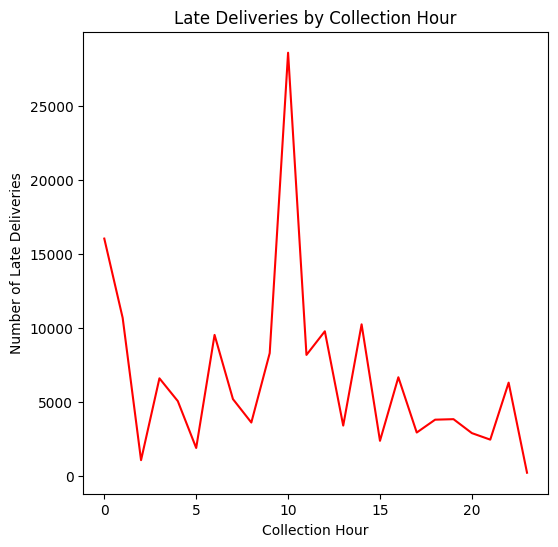

In [43]:
late_deliveries = merged_data[merged_data['Delivery Status'] == "Late"]

# Calculate the number of late deliveries for each collection hour
late_by_hour = late_deliveries['Collection_Hour'].value_counts().sort_index()

# Create a line chart
plt.figure(figsize=(6, 6))
late_by_hour.plot(kind='line', color='red')

# Set the title and axis labels
plt.title('Late Deliveries by Collection Hour')
plt.xlabel('Collection Hour')
plt.ylabel('Number of Late Deliveries')

# Show the chart
plt.show()


This above line chart shows that collections requests between 8am to 11am experience late deliveries. This might be due to drivers/carriers already on field to deliever packages.

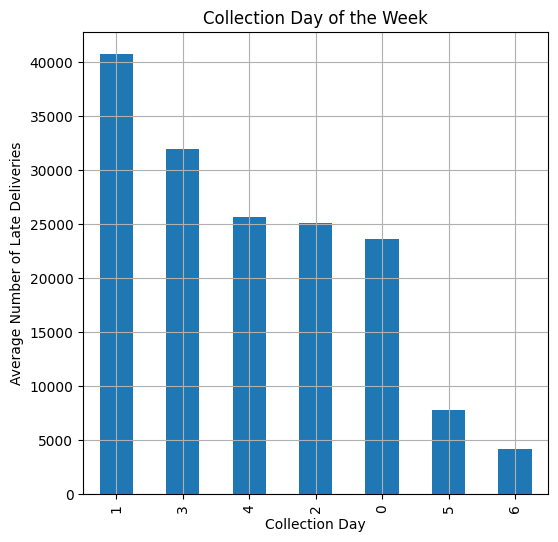

In [44]:
# plot of average of late deliveries by day of the week
collection_day_delivery = late_deliveries['Collection_Day'].value_counts()
# Plot late deliveries by delivery day
plt.figure(figsize=(6, 6))
collection_day_delivery.plot(kind='bar')
plt.title('Collection Day of the Week')
plt.xlabel('Collection Day')
plt.ylabel('Average Number of Late Deliveries')
plt.grid(True)
plt.show()


This plot indicates that collections requests made on Tuesday (2) and Thursday experience more delays while collections during the weekends experience less delays in deliveries thats Saturday(5) and Sunday(6).

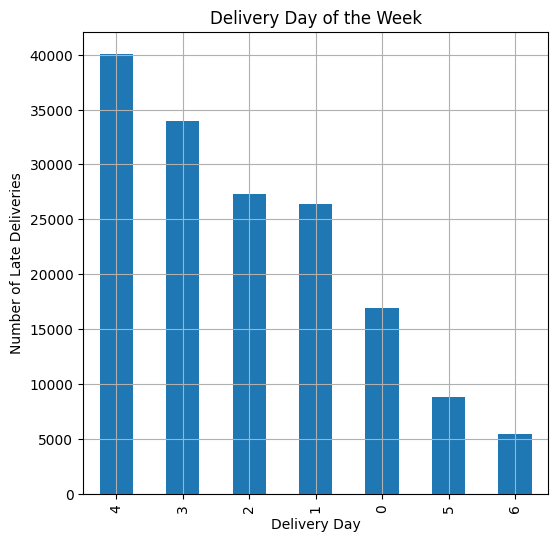

In [45]:
# plot of late deliveries
delivery_day_delivery = late_deliveries['Delivery_Day'].value_counts()

# Plot late deliveries by delivery day
plt.figure(figsize=(6, 6))
delivery_day_delivery.plot(kind='bar')
plt.title('Delivery Day of the Week')
plt.xlabel('Delivery Day')
plt.ylabel('Number of Late Deliveries')
plt.grid(True)
plt.show()


The chart indicates that deliveries done on Friday(4) and Thursday(3) experience more delay and weekend deliveries are have lesser delay in deliveries. Could this be due to less traffic congestion during the weekends?

# What Collection Hour Have More On-Time Delivery Status?

Here we would assess the collection hour that gets to destination On-Time and also those that get to destination late.

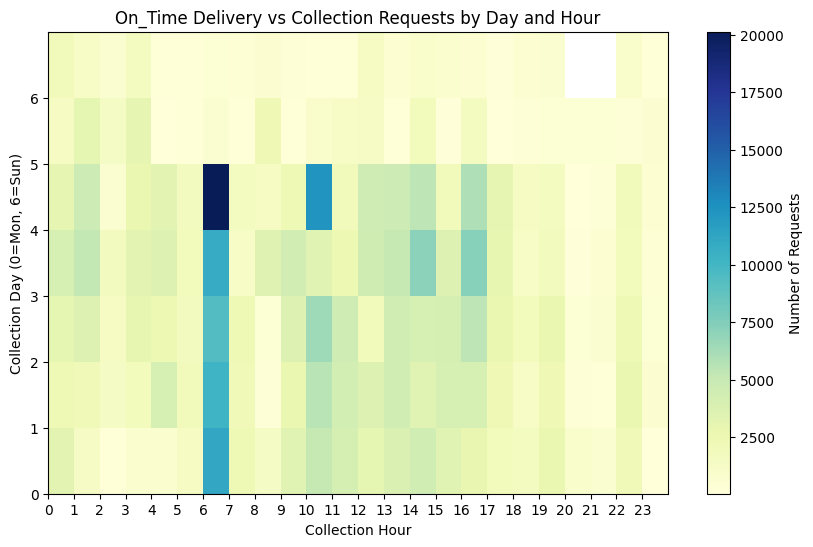

In [46]:
# filter the data for on-time delivery
on_time_delivery = merged_data[merged_data['Delivery Status'] == 'On Time']
collection_requests = on_time_delivery.groupby(['Collection_Day', 'Collection_Hour']).size().unstack()
plt.figure(figsize=(10, 6))
plt.pcolormesh(collection_requests, cmap='YlGnBu')
plt.xlabel('Collection Hour')
plt.ylabel('Collection Day (0=Mon, 6=Sun)')
plt.title('On_Time Delivery vs Collection Requests by Day and Hour')
plt.colorbar(label='Number of Requests')
plt.xticks(range(collection_requests.columns.size))
plt.yticks(range(collection_requests.index.size))
plt.grid(False)
plt.show()

Packages received before 8am are noted to arrive On-Time to their destination.

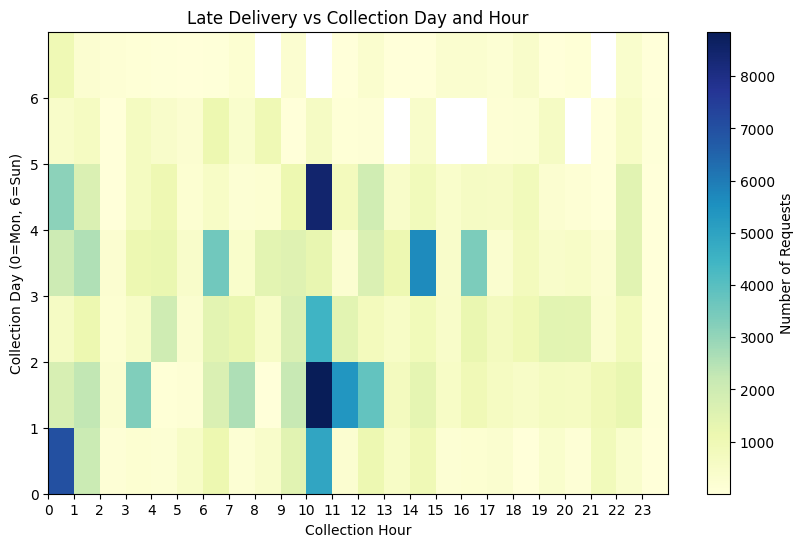

In [47]:
# filter data for collection requests that were late
late_collection_requests = late_deliveries.groupby(['Collection_Day', 'Collection_Hour']).size().unstack()
plt.figure(figsize=(10, 6))
plt.pcolormesh(late_collection_requests, cmap='YlGnBu')
plt.xlabel('Collection Hour')
plt.ylabel('Collection Day (0=Mon, 6=Sun)')
plt.title('Late Delivery vs Collection Day and Hour')
plt.colorbar(label='Number of Requests')
plt.xticks(range(late_collection_requests.columns.size))
plt.yticks(range(late_collection_requests.index.size))
plt.grid(False)
plt.show()

Packages collected during hours of 10 am - 1 pm tend to be delivered late.

# Route Analysis

Here we want to assess the distance from collection point to delivery to understand if shorter or longer routes affect the delivery status of our packages. How we can optimize this. Utilizing collection and delivery latitude and longitude to calculate the distance between these point.

In [48]:
from math import radians, sin, cos, asin, sqrt

# initailize radius of the earth
earth_radius = 6371

def distance(lat1, lon1, lat2, lon2):
  lat1 = radians(lat1)
  lon1 = radians(lon1)
  lat2 = radians(lat2)
  lon2 = radians(lon2)

  # difference in latitude and longitude
  dlat = lat2 - lat1
  dlon = lon2 - lon1

  # apply haversine formula
  a = sin(dlat / 2) * sin(dlat / 2) + cos(lat1) * cos(lat2) * sin(dlon / 2) * sin(dlon / 2)
  c = 2 * asin(sqrt(a))

  # Distance in kilometers
  distance = earth_radius * c

  return distance

merged_data['distance_km'] = merged_data.apply(lambda row: distance(row['FIRST_COLLECTION_LATITUDE'], row['FIRST_COLLECTION_LONGITUDE'], row['LAST_DELIVERY_LATITUDE'], row['LAST_DELIVERY_LONGITUDE']), axis=1)
merged_data



,PROJECT_ID,SHIPMENT_NUMBER,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,...,LAST_DELIVERY_SCHEDULE_LATEST,LAT,LON,RECORD_TIMESTAMP,Delivery Status,Collection_Day,Delivery_Day,Collection_Hour,Delivery_Hour,distance_km
4,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,...,2023-12-20 08:56:00+00:00,53.763753,-1.739292,2023-12-19 15:47:00+00:00,On Time,1,2,14,8,265.236064
5,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,...,2023-12-20 08:56:00+00:00,53.763485,-1.739944,2023-12-19 15:54:00+00:00,On Time,1,2,14,8,265.236064
6,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,...,2023-12-20 08:56:00+00:00,53.763283,-1.740726,2023-12-19 15:55:00+00:00,On Time,1,2,14,8,265.236064
7,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,...,2023-12-20 08:56:00+00:00,53.762547,-1.743427,2023-12-19 15:56:00+00:00,On Time,1,2,14,8,265.236064
8,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,...,2023-12-20 08:56:00+00:00,53.766539,-1.746282,2023-12-19 15:57:00+00:00,On Time,1,2,14,8,265.236064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641657,66a23663-0195-46f2-a5e4-da256bcba47b,SEZHUK-230925-247295,CAUK001009,3.5T Van,LWB Van,DE74 2TR,EN1 1TX,52.829374,-1.332134,51.650981,...,2023-10-05 09:20:00+00:00,51.657342,-0.059207,2023-10-05 06:54:00+00:00,On Time,3,3,4,9,157.267033
641658,66a23663-0195-46f2-a5e4-da256bcba47b,SEZHUK-230925-247295,CAUK001009,3.5T Van,LWB Van,DE74 2TR,EN1 1TX,52.829374,-1.332134,51.650981,...,2023-10-05 09:20:00+00:00,51.653368,-0.059323,2023-10-05 06:55:00+00:00,On Time,3,3,4,9,157.267033
641659,66a23663-0195-46f2-a5e4-da256bcba47b,SEZHUK-230925-247295,CAUK001009,3.5T Van,LWB Van,DE74 2TR,EN1 1TX,52.829374,-1.332134,51.650981,...,2023-10-05 09:20:00+00:00,51.652401,-0.053375,2023-10-05 06:56:00+00:00,On Time,3,3,4,9,157.267033
641660,66a23663-0195-46f2-a5e4-da256bcba47b,SEZHUK-230925-247295,CAUK001009,3.5T Van,LWB Van,DE74 2TR,EN1 1TX,52.829374,-1.332134,51.650981,...,2023-10-05 09:20:00+00:00,51.651104,-0.055444,2023-10-05 07:00:00+00:00,On Time,3,3,4,9,157.267033


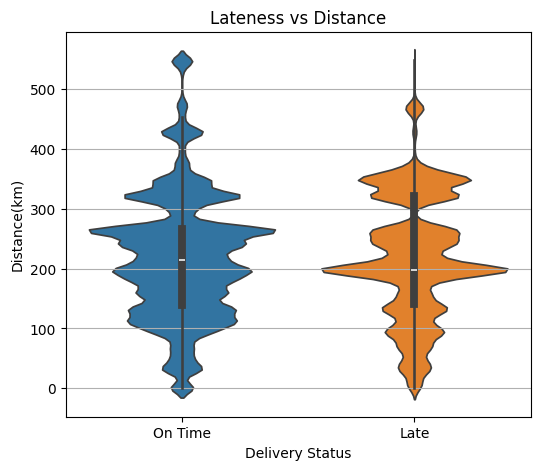

In [51]:
import seaborn as sns

# visualize the distance
plt.figure(figsize=(6,5))
sns.violinplot(x="Delivery Status", y="distance_km", data=merged_data, hue='Delivery Status')
plt.xlabel('Delivery Status')
plt.ylabel('Distance(km)')
plt.title('Lateness vs Distance')
plt.grid(axis='y')
plt.show()

# On-Time Delivery Rate By Vehicle Type

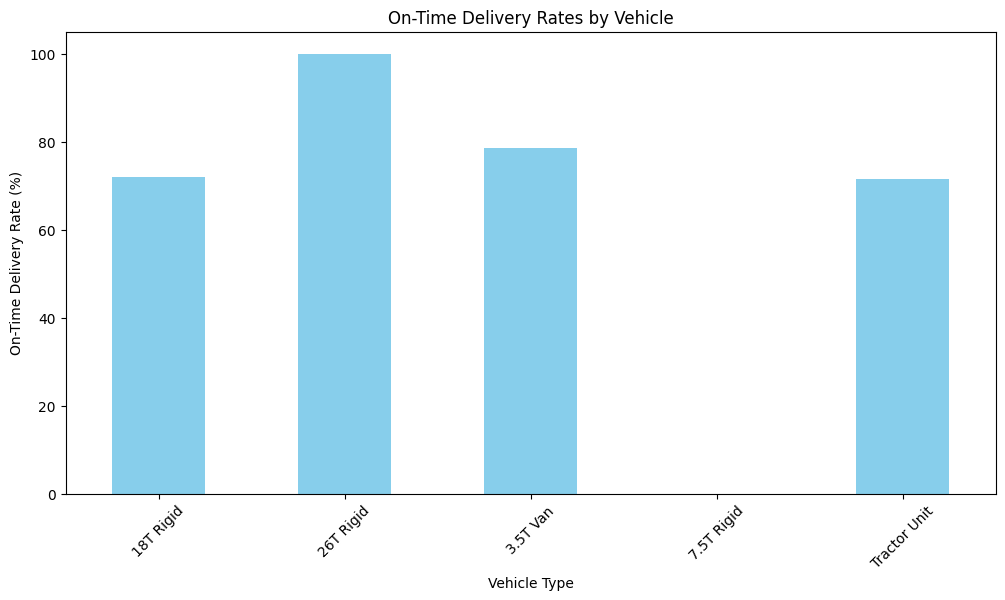

In [52]:
# Calculate on-time delivery rates by vehicle type
on_time_vehicles = merged_data[merged_data['Delivery Status'] == 'On Time']
total_deliveries_by_vehicle = merged_data.groupby('VEHICLE_SIZE').size()
on_time_deliveries_by_vehicle = on_time_vehicles.groupby('VEHICLE_SIZE').size()

on_time_delivery_rate = (on_time_deliveries_by_vehicle / total_deliveries_by_vehicle) * 100
on_time_delivery_rate = on_time_delivery_rate.fillna(0)  # Fill NaN values with 0


# # Plot On-Time Delivery Rates by Carrier
plt.figure(figsize=(12, 6))
on_time_delivery_rate.plot(kind='bar', color='skyblue')
plt.title('On-Time Delivery Rates by Vehicle')
plt.xlabel('Vehicle Type')
plt.ylabel('On-Time Delivery Rate (%)')
plt.xticks(rotation=45)
plt.show()

26T Rigid vehicle sizes have the highest On-Time delivery with 3.5T Van having the least delivery rate,

# COLLECTION LENGTH IMPACT ON ON-TIME DELIVERY

In [53]:
# Calculate the length of collection and delivery windows
merged_data['Collection_Window_Length'] = (merged_data['FIRST_COLLECTION_SCHEDULE_LATEST'] - merged_data['FIRST_COLLECTION_SCHEDULE_EARLIEST']).dt.total_seconds() / 3600
merged_data['Delivery_Window_Length'] = (merged_data['LAST_DELIVERY_SCHEDULE_LATEST'] - merged_data['LAST_DELIVERY_SCHEDULE_EARLIEST']).dt.total_seconds() / 3600

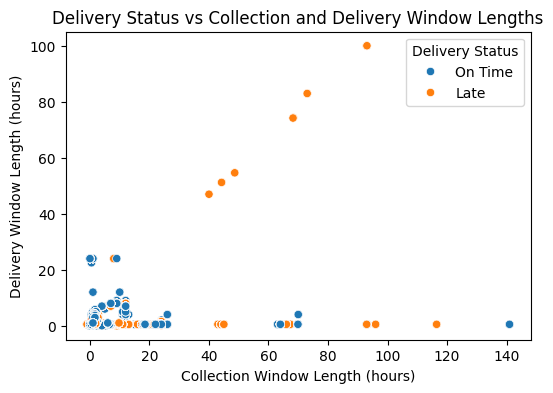

In [54]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=merged_data, x='Collection_Window_Length', y='Delivery_Window_Length', hue='Delivery Status')
plt.title('Delivery Status vs Collection and Delivery Window Lengths')
plt.xlabel('Collection Window Length (hours)')
plt.ylabel('Delivery Window Length (hours)')
plt.show()

There appears to be a positive correlation between the length of collection and delivery windows and the occurrence of late deliveries.

# Predict likelihood

In [55]:
merged_data.head()

,PROJECT_ID,SHIPMENT_NUMBER,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,...,LON,RECORD_TIMESTAMP,Delivery Status,Collection_Day,Delivery_Day,Collection_Hour,Delivery_Hour,distance_km,Collection_Window_Length,Delivery_Window_Length
4,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,...,-1.739292,2023-12-19 15:47:00+00:00,On Time,1,2,14,8,265.236064,1.666667,2.933333
5,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,...,-1.739944,2023-12-19 15:54:00+00:00,On Time,1,2,14,8,265.236064,1.666667,2.933333
6,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,...,-1.740726,2023-12-19 15:55:00+00:00,On Time,1,2,14,8,265.236064,1.666667,2.933333
7,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,...,-1.743427,2023-12-19 15:56:00+00:00,On Time,1,2,14,8,265.236064,1.666667,2.933333
8,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,...,-1.746282,2023-12-19 15:57:00+00:00,On Time,1,2,14,8,265.236064,1.666667,2.933333


In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from geopy.distance import geodesic

# Load the dataset
data = new_df

# Data cleaning
data.dropna(inplace=True)

# Feature engineering
data['distance'] = data.apply(lambda row: geodesic((row['FIRST_COLLECTION_LATITUDE'], row['FIRST_COLLECTION_LONGITUDE']),
                                                   (row['LAST_DELIVERY_LATITUDE'], row['LAST_DELIVERY_LONGITUDE'])).km, axis=1)
data['collection_duration'] = (pd.to_datetime(data['FIRST_COLLECTION_SCHEDULE_LATEST']) - pd.to_datetime(data['FIRST_COLLECTION_SCHEDULE_EARLIEST'])).dt.total_seconds() / 3600
data['delivery_duration'] = (pd.to_datetime(data['LAST_DELIVERY_SCHEDULE_LATEST']) - pd.to_datetime(data['LAST_DELIVERY_SCHEDULE_EARLIEST'])).dt.total_seconds() / 3600
data['is_delayed'] = (pd.to_datetime(data['LAST_DELIVERY_SCHEDULE_LATEST']) - pd.to_datetime(data['LAST_DELIVERY_SCHEDULE_EARLIEST'])).dt.total_seconds() > data['delivery_duration']

data.head()

,SHIPMENT_NUMBER,SHIPPER_ID,CARRIER_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,LAST_DELIVERY_LONGITUDE,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST,distance,collection_duration,delivery_duration,is_delayed
0,SEZHUK-240118-283413,ee7cbc7b-4f14-44ac-9c6e-086d70a27141,CAUK000872,Tractor Unit,Box,DUBLIN,DN3 3FF,53.407411,-6.238118,53.537912,-1.033570,2024-01-18T18:00:00.000Z,2024-01-18T23:00:00.000Z,2024-01-19T12:00:00.000Z,2024-01-19T13:00:00.000Z,345.818926,5.000000,1.0,True
1,SEZHUK-240111-281159,192cd5b5-978c-4681-b206-2f4d04e081ec,CAUK000876,Tractor Unit,Curtain-Side 13.6M Trailer,LS24 9SD,BT26 6JJ,53.882244,-1.267537,54.474078,-6.104285,2024-01-12T10:00:00.000Z,2024-01-16T07:00:00.000Z,2024-01-16T07:30:00.000Z,2024-01-16T08:00:00.000Z,322.545328,93.000000,0.5,True
2,SEZHUK-240110-280958,ee7cbc7b-4f14-44ac-9c6e-086d70a27141,CAUK000872,Tractor Unit,Curtain-Side 13.6M Trailer,DUBLIN,DN3 3FF,53.407411,-6.238118,53.537912,-1.033570,2024-01-11T15:03:00.000Z,2024-01-11T15:33:00.000Z,2024-01-12T14:33:00.000Z,2024-01-12T15:03:00.000Z,345.818926,0.500000,0.5,True
3,SEZHUK-240115-282151,3244246f-e37c-4ba4-b9b3-61416a4449ae,CAUK000250,Tractor Unit,Curtain-Side 13.6M Trailer,S80 3FY,DUBLIN,53.293393,-1.074008,53.294121,-6.441900,2024-01-16T06:00:00.000Z,2024-01-16T06:59:00.000Z,2024-01-18T11:01:00.000Z,2024-01-18T11:31:00.000Z,357.850440,0.983333,0.5,True
4,SEZHUK-240110-280768,3244246f-e37c-4ba4-b9b3-61416a4449ae,CAUK000250,Tractor Unit,Curtain-Side 13.6M Trailer,S80 3FY,BT36 7LQ,53.293393,-1.074008,54.664518,-5.932184,2024-01-11T06:00:00.000Z,2024-01-11T06:59:00.000Z,2024-01-15T07:25:00.000Z,2024-01-15T07:55:00.000Z,353.288971,0.983333,0.5,True


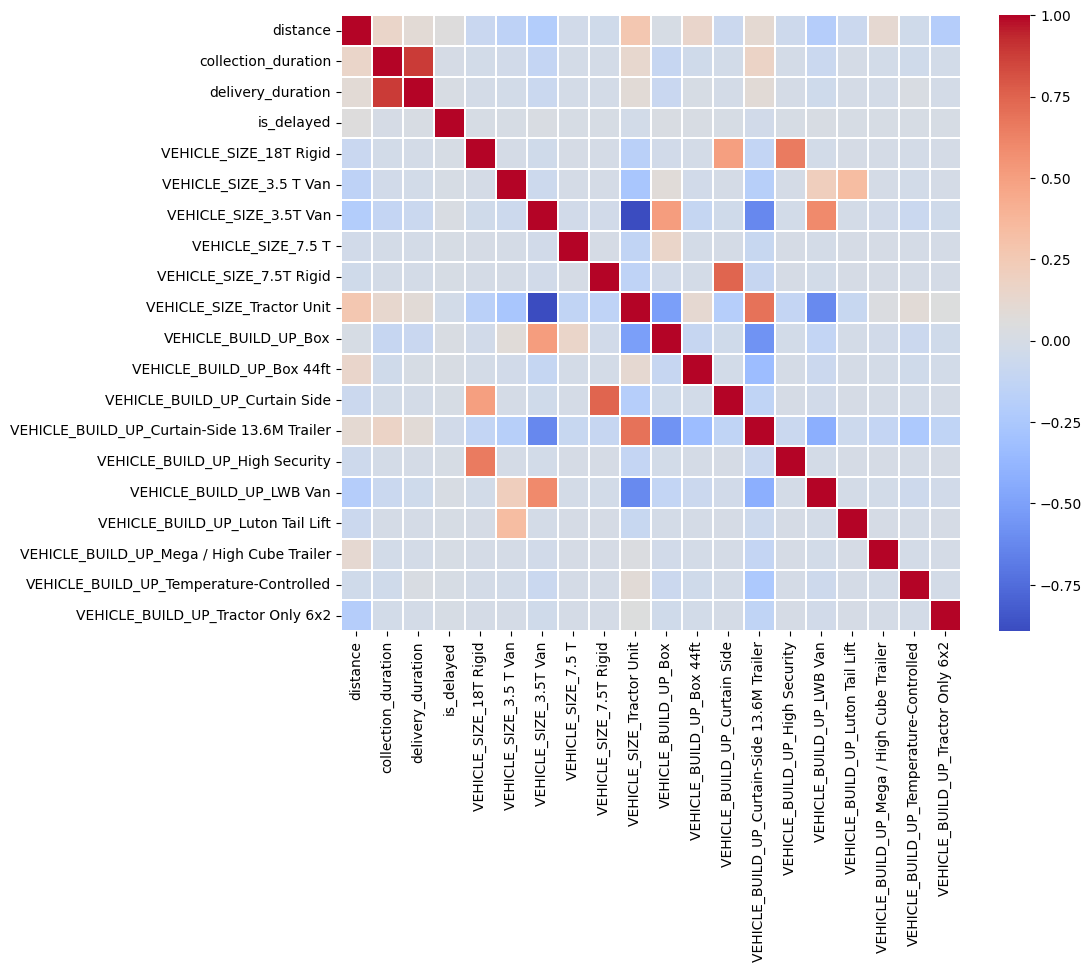

In [57]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
scaler = StandardScaler()

# Categorical feature encoding
data = pd.get_dummies(data, columns=['VEHICLE_SIZE', 'VEHICLE_BUILD_UP'])

# Normalization/Standardization
numerical_features = ['distance', 'collection_duration', 'delivery_duration']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Remove ID-related columns for correlation analysis
corr_data = data.drop(columns=['SHIPMENT_NUMBER', 'SHIPPER_ID', 'CARRIER_ID', 'FIRST_COLLECTION_LATITUDE',	'FIRST_COLLECTION_LONGITUDE',	'LAST_DELIVERY_LATITUDE',	'LAST_DELIVERY_LONGITUDE',
                               'FIRST_COLLECTION_SCHEDULE_EARLIEST', 'FIRST_COLLECTION_SCHEDULE_LATEST',
                               'LAST_DELIVERY_SCHEDULE_EARLIEST', 'LAST_DELIVERY_SCHEDULE_LATEST', 'FIRST_COLLECTION_POST_CODE', 'LAST_DELIVERY_POST_CODE'])

# Correlation analysis: Use heatmap visualization
plt.figure(figsize=(10, 8))
correlation_matrix = corr_data.corr()
sns.heatmap(correlation_matrix,cmap='coolwarm', linewidths=0.3, annot_kws={"size": 10})
plt.show()


In [59]:
from scipy import stats
from imblearn.over_sampling import SMOTE

# Feature and target separation
features = corr_data.drop(columns=['is_delayed'])
target = corr_data['is_delayed']

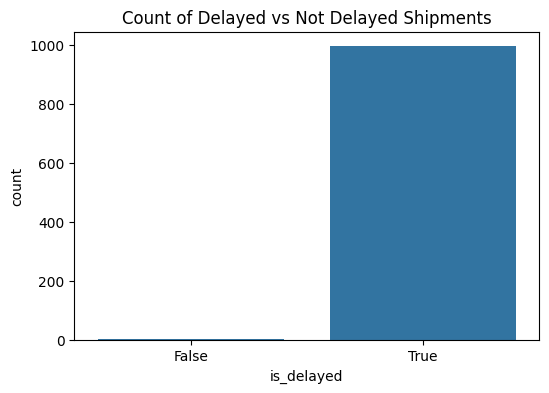

In [60]:
# Visualize Class Imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x=target)
plt.title('Count of Delayed vs Not Delayed Shipments')
plt.show()

In [63]:
# Address Class Imbalance using SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(features, target)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Model training
rf_model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC: 1.0


<ipython-input-64-f7e5f1317632>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


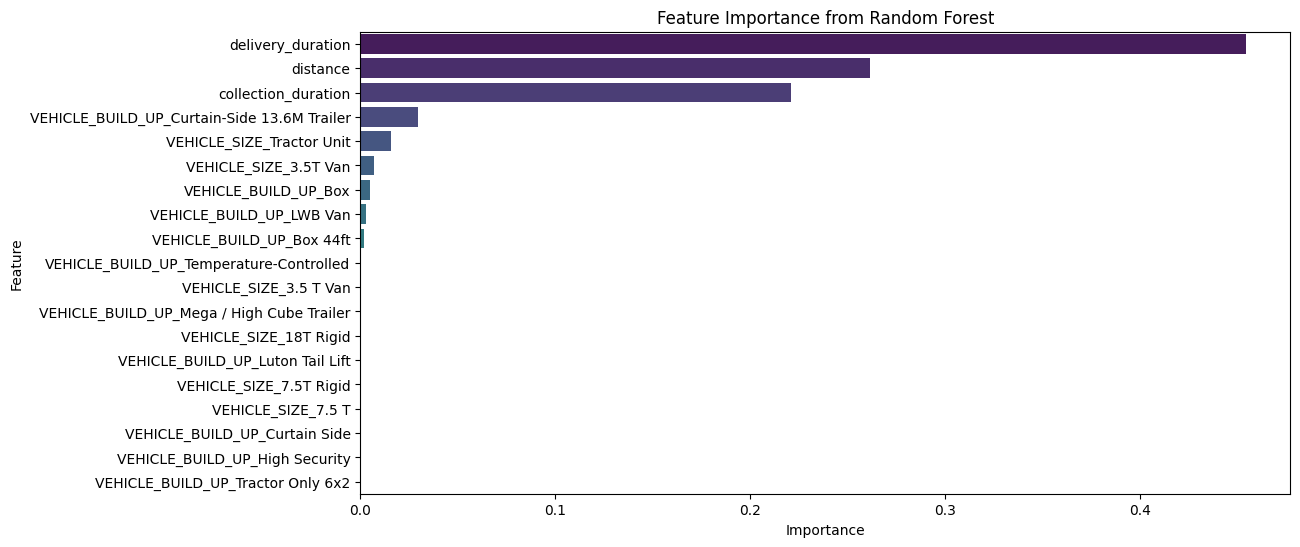

In [64]:
# Feature importance
importances = best_model.feature_importances_
feature_names = features.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.show()

Model deployment step:

- Model Serialization

  - Choice of Format:

    - Pickle: The standard Python way for object serialization. Simple, but might have compatibility issues across Python versions.
    - Joblib: Optimized for large NumPy arrays (common in machine learning).

- API Creation:
This step allow our users to send input data to the model and receive predictions back.

 - In this step we will use FastAPI to service our model and include certain number of workers and processes.


- Deployment Considerations:

  - Scaling: Design your API to handle increased traffic if needed (load balancing, auto-scaling).
  - Monitoring: Track model performance (accuracy, latency) in production.
  - Security: Protect your API from unauthorized access. Implement input validation.
  - Model Versioning: Manage different versions of your model (e.g., to roll back in case of issues).


- Deployment steps after serving as a FastAPI endpoint:

  - Build the Docker Image: docker build -t rf_api .

  - Run the Docker Container: docker run -d -p 8000:8000 rf_api

  - Test the API: Send a POST request to http://localhost:8000/predict with the input data.